In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
palette = [
    "#3C38A0",  # deep indigo
#    "#7152B8",  # royal purple (new)
    "#1B7A6E",  # lighter teal
    "#3A2C20",  # cool dark brown
    "#C26824",  # bright burnt orange
    "#7A014A",  # wine magenta
]

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette)

plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rcParams["font.size"] = 14

In [71]:
def sample_average_path_length(W=1.0, H=1.0, d=1.0, dx=0.0, dy=0.0, n=2, N=200000, seed=42):
    rng = np.random.default_rng(seed)
    # positions on detector A
    xs = rng.uniform(-W/2, W/2, size=N)
    ys = rng.uniform(-H/2, H/2, size=N)
    # directions: phi uniform, theta from cos^n distribution
    U = rng.random(N)
    cos_theta = (1 - U)**(1.0/(n+1))
    sin_theta = np.sqrt(np.maximum(0.0, 1 - cos_theta**2))
    phi = rng.uniform(0, 2*np.pi, size=N)
    vx = sin_theta * np.cos(phi)
    vy = sin_theta * np.sin(phi)
    vz = cos_theta
    h = rng.uniform(d-0.02, d+0.02, size=N)
    t = h / vz
    xb = xs + t * vx
    yb = ys + t * vy
    hit_mask = (xb >= dx - W/2) & (xb <= dx + W/2) & (yb >= dy - H/2) & (yb <= dy + H/2)
    hits = np.count_nonzero(hit_mask)
    if hits == 0:
        return {'hits':0, 'N':N, 'acceptance':0.0, 'avg_path_length':None}
    L = d / cos_theta[hit_mask]
    
    nh, be = np.histogram(L, density = True, bins = 100)

    plt.hist(L, density = False, bins = 100)
#    plt.yscale('log')
    plt.show()
    return {
        'hits': int(hits),
        'N': int(N),
        'acceptance': hits / N,
        'avg_path_length': float(np.mean(L)),
        'median_path_length': float(np.median(L)),
        'std_path_length': float(np.std(L))
    } , nh, be


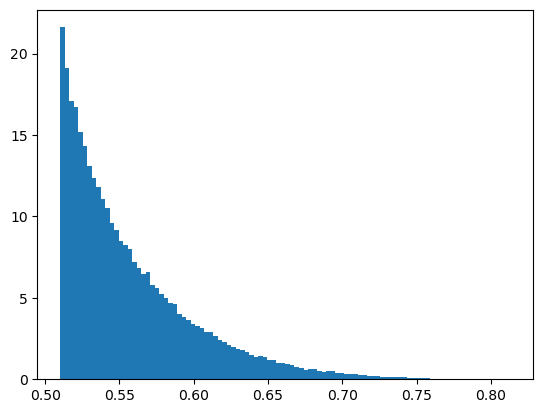

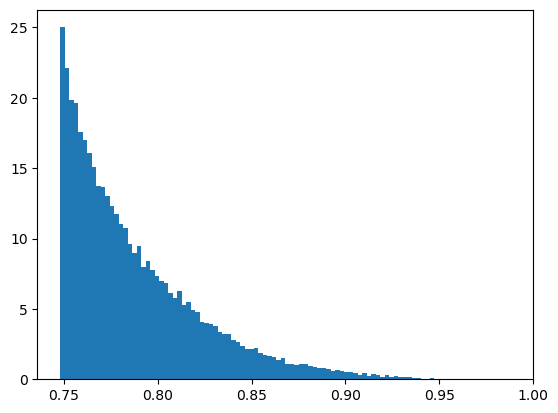

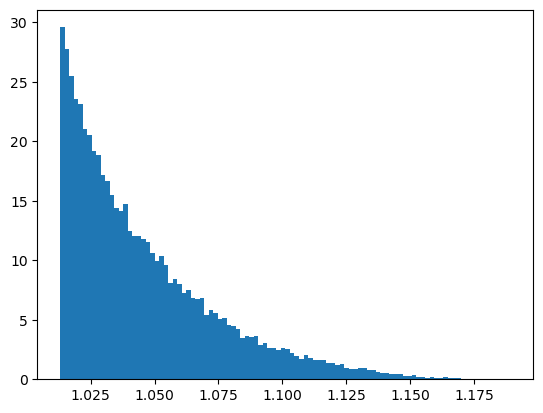

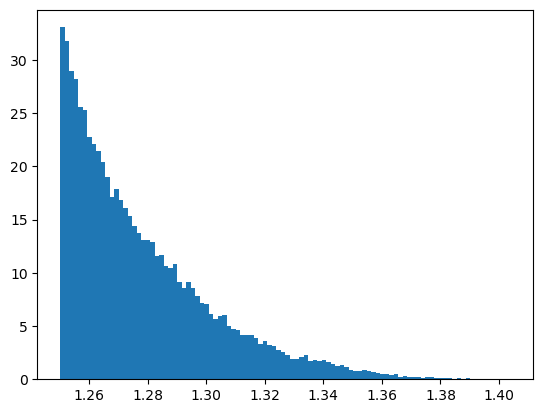

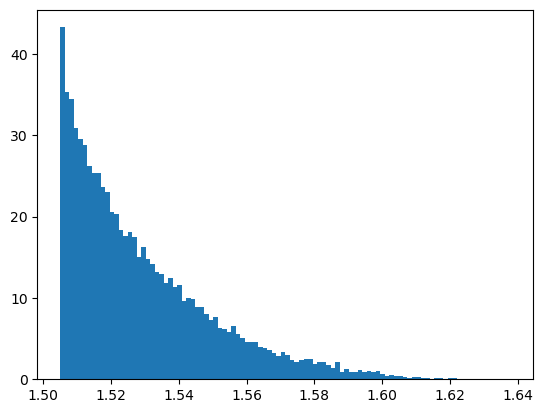

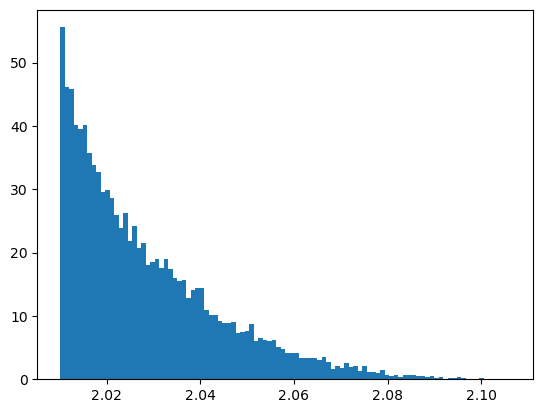

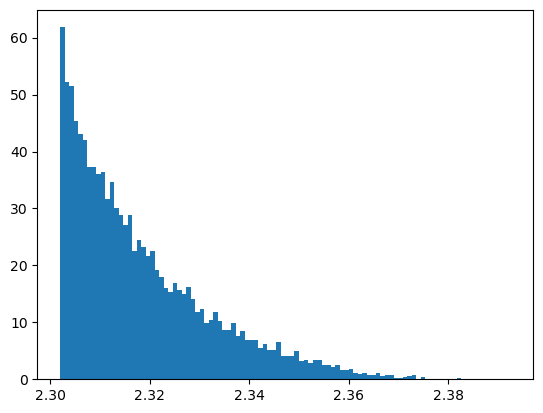

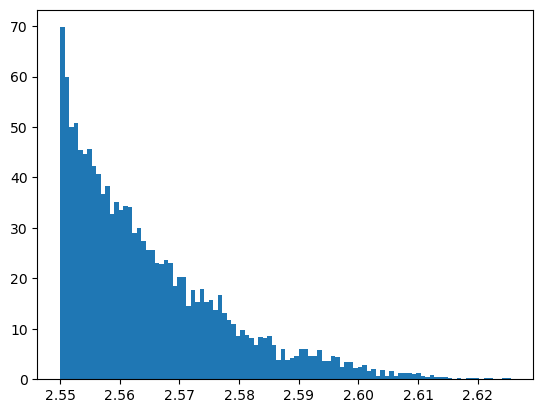

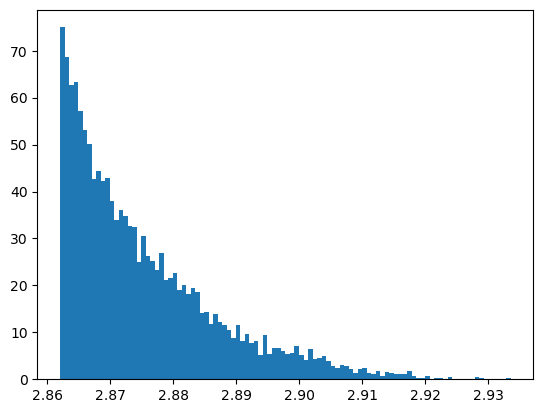

[0.5572384702411161, 0.7877879586871885, 1.0455422106705674, 1.2778695320494617, 1.5289115355094545, 2.0283714888774136, 2.3182074695300536, 2.5648477399492435, 2.8751517597342344]
[0.0440011286448253, 0.035865649188914016, 0.029116996723225423, 0.02455168555851734, 0.021146923328094102, 0.016124650802963124, 0.014235688419622174, 0.012957518260764857, 0.01179886284201636]


In [66]:
heights =  np.array([0.510, 0.748, 1.013, 1.250, 1.505, 2.010, 2.302, 2.550, 2.862])
W = 0.40
H = 0.55

lengths = []
lengthserr = []

for d in heights:
    result, _, _ = sample_average_path_length(W, H, d, dx=0.0, dy=0.0, n=2, N=500000, seed=None)
    lengths.append(result['avg_path_length'])
    lengthserr.append(result['std_path_length'])
#    print(result)

print(lengths)
print(lengthserr)

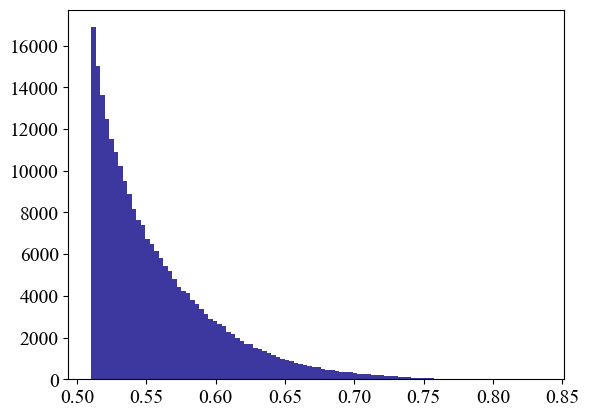

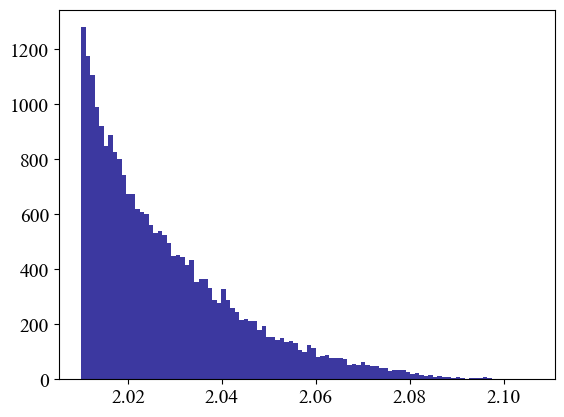

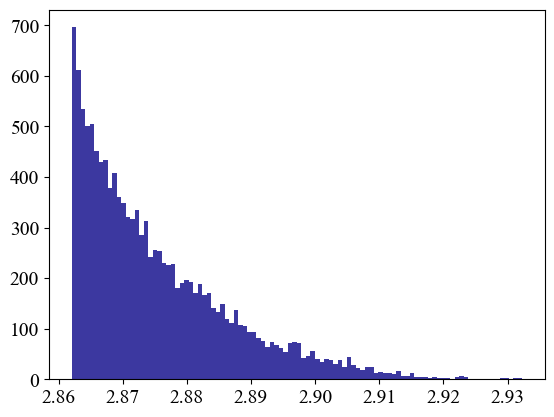

[0.5572384702411161, 0.7877879586871885, 1.0455422106705674, 1.2778695320494617, 1.5289115355094545, 2.0283714888774136, 2.3182074695300536, 2.5648477399492435, 2.8751517597342344]
[0.0440011286448253, 0.035865649188914016, 0.029116996723225423, 0.02455168555851734, 0.021146923328094102, 0.016124650802963124, 0.014235688419622174, 0.012957518260764857, 0.01179886284201636]


In [103]:
heights =  np.array([0.510, 2.010, 2.862])
W = 0.40
H = 0.55

nhs = []
bes = []

for d in heights:
    result, nh, be = sample_average_path_length(W, H, d, dx=0.0, dy=0.0, n=2, N=1000000, seed=None)
    nhs.append(nh)
    bes.append(be)

print(lengths)
print(lengthserr)

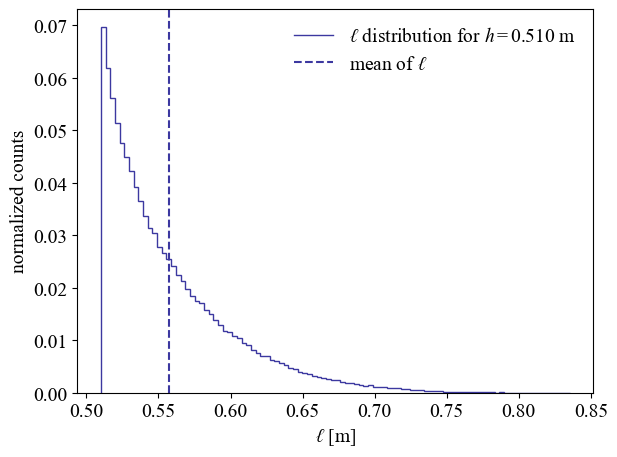

In [120]:
plt.stairs(nhs[0]/np.sum(nhs[0]), bes[0], color = 'C0', label = r'$\ell$ distribution for $h = 0.510$ m')
plt.axvline(0.5572384702411161, color = 'C0', linestyle = '--', label = r'mean of $\ell$')
plt.xlabel(r'$\ell$ [m]' )
plt.ylabel(r'normalized counts' )
#plt.stairs(nhs[1]/np.sum(nhs[1]), bes[1], color = 'C1')
#plt.axvline(2.0283714888774136, color = 'C1')
#plt.stairs(nhs[2]/np.sum(nhs[2]), bes[2], color = 'C2')
#plt.axvline(2.8751517597342344, color = 'C2')

plt.legend(frameon = False)
plt.tight_layout()
plt.savefig('travel_length.pdf')